<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/05_Sentiment_Intro.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Getting Started with Sentiment Analysis**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content, Machine Learning resoures, and the content created by Prof. Timothy E. Carone.  
> **Objective:** Introduction to Sentiment Analysis using R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

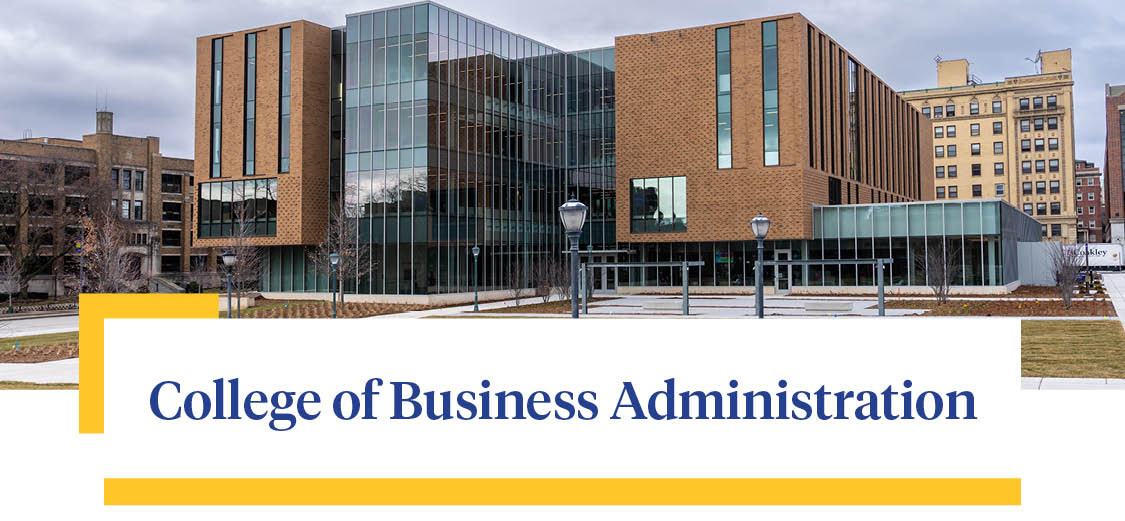
---

## [1. Intro](#intro)


Introduction to the sentiment analytics workflow overview.

## [2. Objective](#obj)

This tutorial utilizes the twitter dataset provided in the class.




## [3. Sentiment Analysis - twitter data with sentiment column](#pract1)

### 3.1. Load the library

In [ ]:
# ========================================================
# Step 1: Download the library (~ 10 mins)
# ========================================================

# Core data and visualization
install.packages("readr")       # Fast and friendly CSV file I/O

# Text mining and processing
install.packages("tidyverse")
install.packages("tidytext")
install.packages("tm")          # Text preprocessing and analysis framework
install.packages("wordcloud")   # Generate word clouds from text data

# Advanced analysis (optional but independent)
install.packages("biclust")     # Perform biclustering (joint row/column clustering)
install.packages("cluster")     # General clustering algorithms and tools
install.packages("igraph")      # Network analysis and graph visualization
install.packages("fpc")         # Cluster validation and stability evaluation

# Visualization helpers
install.packages("ggplot2")     # Elegant data visualization system
install.packages("RColorBrewer")# Predefined color palettes for plots and word clouds
install.packages("gridExtra")   # Arrange multiple ggplot2 plots on one page
install.packages("cowplot")     # Combine and align ggplot2 plots more cleanly



In [14]:
# ========================================================
# Step 2: Include the library (~ 10 mins)
# ========================================================

library(tidyverse)
library(tidytext)
library(ggplot2)                # includes library(reshape2) library(scales)
library(readr)
library(tm)                     # includes library(SnowballC)
library(RColorBrewer)
library(wordcloud)
library(biclust)
library(cluster)
library(igraph)
library(fpc)
library(gridExtra)
library(cowplot)
library(readr)

### 3.2. Load the data

In [ ]:
# ========================================================
# Step 3: Upload the datafile
# ========================================================

airline <- read.csv("Tweets.csv")

# head(airline)
colnames(airline)

### 3.3. Visualization on the established sentiment column

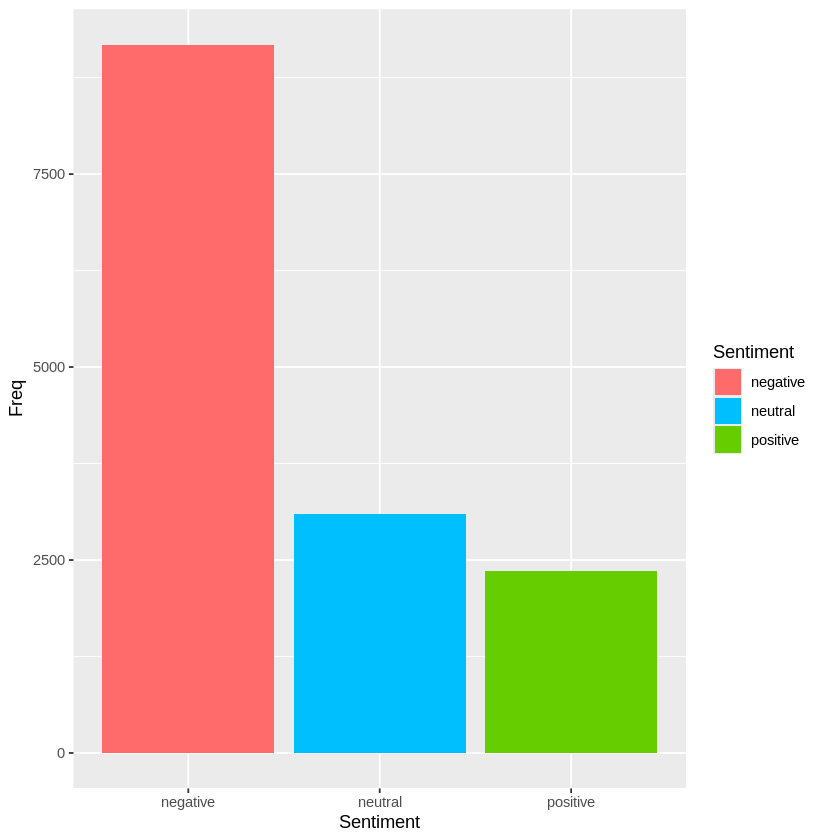

In [5]:
# ========================================================
# Step 4: Sentiment Visualization V1
# ========================================================

overallSentiment <- as.data.frame(table(airline$airline_sentiment))

colnames(overallSentiment) <- c("Sentiment", "Freq")

histPlot1 <- ggplot(overallSentiment) +
             aes(x=Sentiment, y=Freq, fill=Sentiment) +
             scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3")) +
             geom_bar(stat="identity")

histPlot1

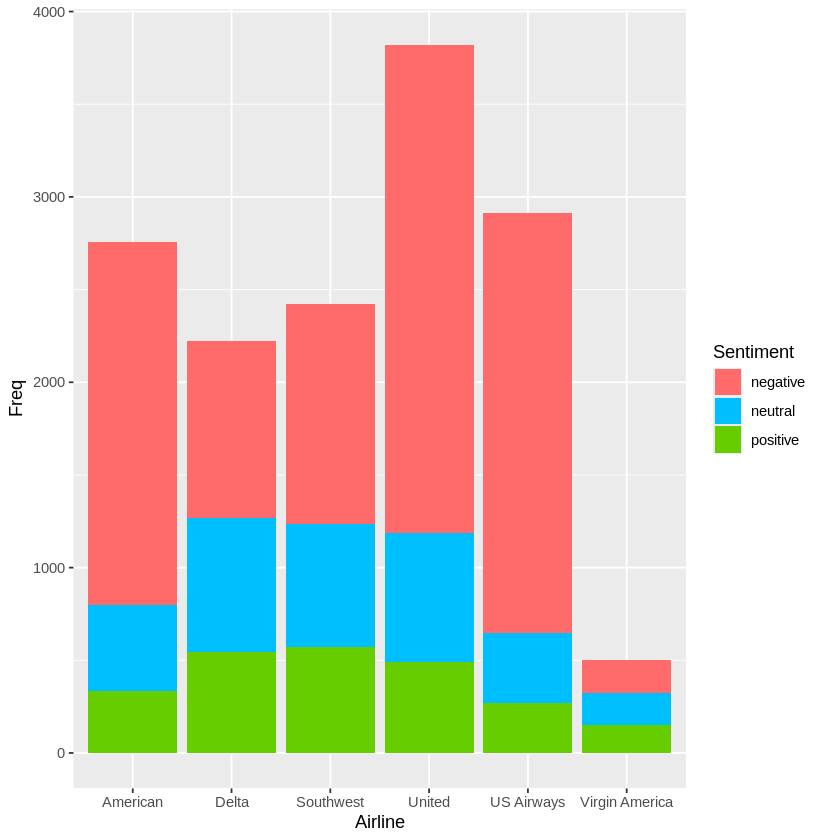

In [6]:
# ========================================================
# Step 5: Sentiment Visualization V2
# ========================================================

airlineSentiment <- as.data.frame(table(airline$airline,
                                  airline$airline_sentiment))

colnames(airlineSentiment) <- c("Airline","Sentiment","Freq")

colours <- c("firebrick1","deepskyblue","chartreuse3")

histPlot2 <- ggplot(airlineSentiment) +
             aes(x=Airline,y=Freq,fill=Sentiment) +
             scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3")) +
             geom_bar(stat="identity")

histPlot2

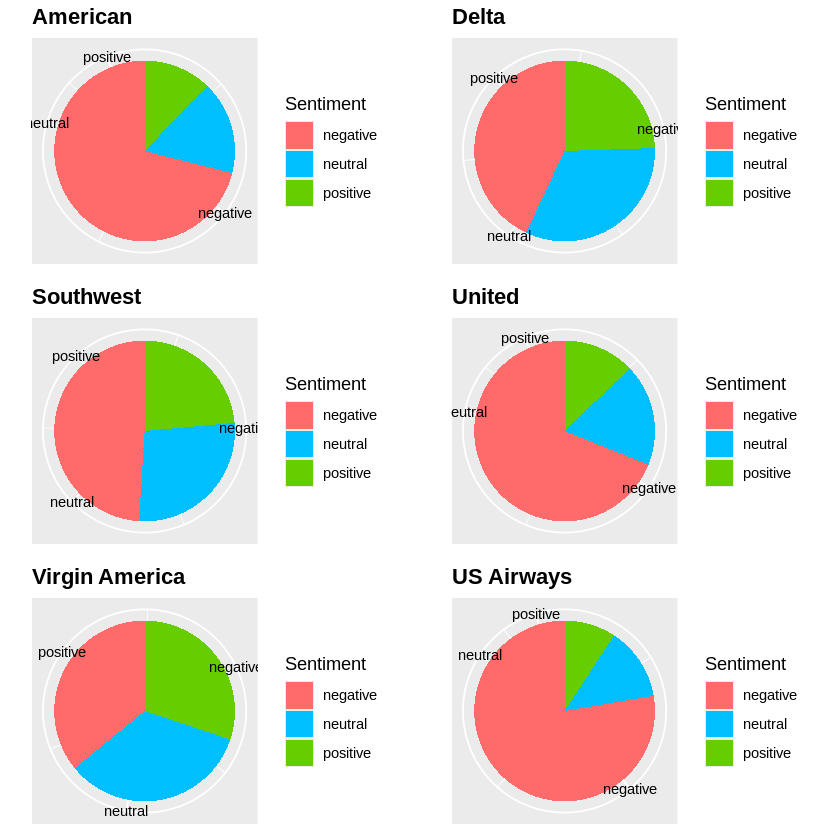

In [7]:
# ========================================================
# Step 6: Sentiment Visualization V3
# ========================================================

# AMERICAN AIRLINES
sentAmerican <- subset(airlineSentiment, Airline == "American")

American <- ggplot(sentAmerican) +
            aes(x="American", y=Freq, fill=Sentiment) +
            geom_bar(stat="identity") +
            coord_polar("y") +
            theme(axis.text.x=element_text(color="black")) +
            theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks <- cumsum(sentAmerican$Freq) - sentAmerican$Freq/2

American <- American +
            scale_y_continuous(breaks=y.breaks, labels=sentAmerican$Sentiment) +
            ggtitle("American") +
            theme(plot.title = element_text(face="bold")) +
            scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# DELTA AIRLINES
sentDelta <- subset(airlineSentiment, Airline == "Delta")

Delta <- ggplot(sentDelta) + aes(x="Delta", y=Freq, fill=Sentiment) +
        geom_bar(stat="identity") +
        coord_polar("y") +
        theme(axis.text.x=element_text(color="black")) +
        theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentDelta$Freq) - sentDelta$Freq/2

Delta <- Delta +
         scale_y_continuous(breaks=y.breaks, labels=sentDelta$Sentiment) +
         ggtitle("Delta") +
         theme(plot.title = element_text(face="bold")) +
         scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))


# SOUTHWEST AIRLINES
sentSouthwest <- subset(airlineSentiment, Airline == "Southwest")

Southwest <- ggplot(sentSouthwest) +
             aes(x="Southwest", y=Freq, fill=Sentiment) +
             geom_bar(stat="identity") +
             coord_polar("y") +
             theme(axis.text.x=element_text(color="black")) +
             theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks <- cumsum(sentSouthwest$Freq) - sentSouthwest$Freq/2

Southwest <- Southwest +
             scale_y_continuous(breaks=y.breaks, labels=sentSouthwest$Sentiment) +
             ggtitle("Southwest") +
             theme(plot.title = element_text(face="bold")) +
             scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# UNITED AIRLINES
sentUnited <- subset(airlineSentiment, Airline == "United")

United <- ggplot(sentUnited) +
          aes(x="United", y=Freq, fill=Sentiment) +
          geom_bar(stat="identity") +
          coord_polar("y") +
          theme(axis.text.x=element_text(color="black")) +
          theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks <- cumsum(sentUnited$Freq) - sentUnited$Freq/2

United <- United +
          scale_y_continuous(breaks=y.breaks, labels=sentUnited$Sentiment) +
          ggtitle("United") +
          theme(plot.title = element_text(face="bold")) +
          scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# VIRGIN AMERICA
sentVAirways <- subset(airlineSentiment, Airline == "Virgin America")

VAirways <- ggplot(sentVAirways) +
            aes(x="Virgin America", y=Freq, fill=Sentiment) +
            geom_bar(stat="identity") +
            coord_polar("y") +
            theme(axis.text.x=element_text(color="black")) +
            theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks <- cumsum(sentVAirways$Freq) - sentVAirways$Freq/2

VAirways <- VAirways +
            scale_y_continuous(breaks=y.breaks, labels=sentVAirways$Sentiment) +
            ggtitle("Virgin America") +
            theme(plot.title = element_text(face="bold")) +
            scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# US AIRWAYS
sentUSAirways <- subset(airlineSentiment, Airline == "US Airways")

USAirways <- ggplot(sentUSAirways) +
             aes(x="US Airways", y=Freq, fill=Sentiment) +
             geom_bar(stat="identity") +
             coord_polar("y") +
             theme(axis.text.x=element_text(color="black")) +
             theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks <- cumsum(sentUSAirways$Freq) - sentUSAirways$Freq/2

USAirways <- USAirways +
             scale_y_continuous(breaks=y.breaks, labels=sentUSAirways$Sentiment) +
             ggtitle("US Airways") +
             theme(plot.title = element_text(face="bold")) +
             scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

plot_grid(American,Delta,Southwest,United,VAirways,USAirways,ncol=2,nrow=3)

Each of these visualizations were produced by taking all the social media content and use sentiment analysis to determine how people feel about your product.

Interpretations can be why is your product doing so well at Virgin America and so poorly at the other airlines? The sentiment analysis tells you something is wrong at most airlines with your product and you have to take a deeper dive.

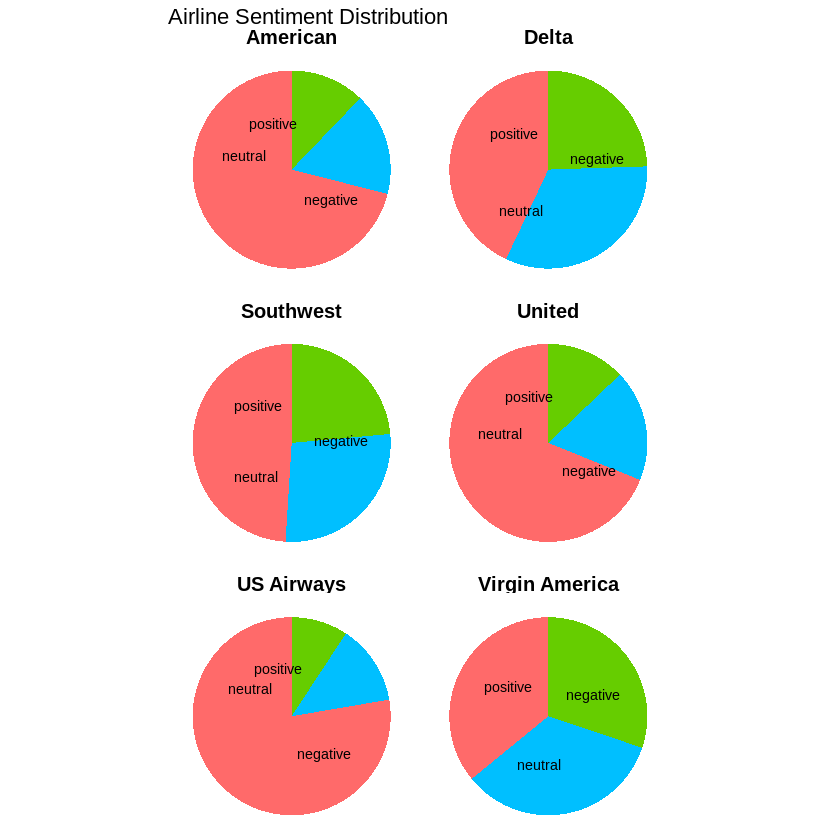

In [8]:
# ========================================================
# Step 7: Simplified & Faceted Version for V3
# ========================================================

airlineSentiment_norm <- airlineSentiment %>%
  group_by(Airline) %>%
  mutate(
    prop = Freq / sum(Freq),
    y_mid = cumsum(prop) - prop / 2
  )

ggplot(airlineSentiment_norm, aes(x = 1, y = prop, fill = Sentiment)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(y = y_mid, label = Sentiment), x = 1, size = 3) +
  coord_polar(theta = "y") +
  facet_wrap(~ Airline, ncol = 2) +
  scale_fill_manual(values = c("indianred1", "deepskyblue", "chartreuse3")) +
  ggtitle("Airline Sentiment Distribution") +
  theme_void() +
  theme(
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "none"
  )


## [4. Sentiment Analysis - Sentiment Lexicon](#pract1)

Sentiment lexicons are developed through crowdsourcing or manual curation and validated using data such as reviews or tweets. While they may be less accurate for older or stylistically different texts, they remain useful for shared vocabulary. Some lexicons are domain-specific, tailored to particular content areas.

Dictionary-based sentiment methods compute overall sentiment by summing individual word scores, though not all words are included, and negations like “not good” are ignored since these methods rely on unigrams. The text size used for aggregation also affects results—smaller units like sentences or paragraphs typically yield more meaningful sentiment patterns.

### 4.1. AFINN Lexicon


Implementation Note:

1.   Colab sessions are non-interactive, so the AFINN lexicon must be downloaded and loaded manually into the notebook.
2.   If you are using a locally deployed R environment, you can access it directly using the `get_sentiments()` function from the tidytext package.

In [98]:
# ========================================================
# Step 1: Get the AFINN lexicon
# ========================================================

download.file("https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt",
              destfile = "AFINN-111.txt")

afinn <- read.delim("AFINN-111.txt",
                    header = FALSE,
                    stringsAsFactors = FALSE,
                    col.names = c("word", "value"))
head(afinn)

,word,value
,<chr>,<int>
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2
6,abductions,-2


### 4.2. Bing Lexicon

Implementation Note:

1.   Colab sessions are non-interactive, so the AFINN lexicon must be downloaded and loaded manually into the notebook.
2.   If you are using a locally deployed R environment, you can access it directly using the `get_sentiments()` function from the tidytext package.

In [121]:
# ========================================================
# Step 2: Get the Bing lexicon
# ========================================================

bing <- get_sentiments("bing")
head(bing)

bing %>%
  count(sentiment)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


sentiment,n
<chr>,<int>
negative,4781
positive,2005


### 4.3. NRC Lexicon


In [122]:
# ========================================================
# Step 3: Get the NRC lexicon
# ========================================================

# Download the NRC Emotion Lexicon
download.file("http://saifmohammad.com/WebDocs/Lexicons/NRC-Emotion-Lexicon.zip",
              destfile = "NRC-Emotion-Lexicon.zip")

# Unzip the downloaded file
unzip("NRC-Emotion-Lexicon.zip", exdir = "/content/nrc_lexicon")

# Verify the extracted files
list.files("nrc_lexicon")

# Specify the correct lexicon file path (adjust file name if different)
nrc_file <- "/content/nrc_lexicon/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

# Load the NRC lexicon into R
nrc <- read_delim(nrc_file, delim = "\t", col_names = c("word", "sentiment", "value"))

# Keep only word–sentiment pairs with a true association (value = 1)
# and remove the value column to create a clean lexicon for analysis
nrc <- nrc %>%
       filter(value == 1) %>%
       dplyr::select(-value)

# Preview the first few rows
head(nrc)

nrc %>%
  filter(sentiment %in% c("positive", "negative")) %>%
  count(sentiment)

[1] "__MACOSX"            "NRC-Emotion-Lexicon"

Rows: 141540 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): word, sentiment
dbl (1): value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear


sentiment,n
<chr>,<int>
negative,3316
positive,2308


### 4.4. Sentiment Analysis with Jane Austen's Novels

Using sentiment analysis on the Jane Austen dataset allows exploration of **emotional patterns** and **word usage** across her novels. By converting the text into a tidy format and joining it with sentiment lexicons (such as NRC, Bing, and AFINN), we can identify **common emotion-related words** (e.g., joy words in Emma) and **track how sentiment shifts** throughout a story like Pride and Prejudice.

Additionally, counting words by sentiment reveals which specific terms contribute most to each emotional category, providing deeper insight into tone and mood across the narratives.

#### 4.4.1 Jane Austen R library

In [23]:
# ========================================================
# Step 4: Download and include the library and data
# ========================================================

install.packages("janeaustenr")
library(janeaustenr)
# library(tidytext) # comment out if library not included

# Note: R does not require indentation or enforce strict formatting rules.
# The following code is structured to clearly illustrate how operations are connected using the pipe operator for better readability and understanding. You do not need to follow this specific formatting style.

tidy_books <- austen_books()                                %>%
              group_by(book)                                %>%
              mutate(linenumber = row_number(),
                     chapter = cumsum(
                                     str_detect(text,
                                     regex("^chapter [\\divxlc]",
                                     ignore_case = TRUE)))) %>%
              ungroup()                                     %>%
              unnest_tokens(word, text)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
colnames(tidy_books)
head(tidy_books)

[1] "book"       "linenumber" "chapter"    "word"

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


Notice that we chose the name `word` for the output column from `unnest_tokens()`. This is a convenient choice because the sentiment lexicons and stop word datasets have columns named word; performing inner joins and anti-joins is thus easier.

Now that the text is in a tidy format with one word per row, we are ready to do the sentiment analysis. First, let’s use the NRC lexicon and `filter()` for the joy words. Next, let’s `filter()` the data frame with the text from the books for the words from Emma and then use `inner_join()` to perform the sentiment analysis. What are the most common joy words in Emma? Let’s use `count()` from dplyr.

#### 4.4.2 Sentiment Analysis with Inner Join

Sentiment analysis in **tidy text format** can be performed using an inner join between the text data and a sentiment lexicon—similar to how stop words are removed using an antijoin.

In [ ]:
# ========================================================
# Step 5: Reference the NRC sentiment lexicon
# ========================================================

nrc_joy <- nrc %>%
filter(sentiment == "joy")

tidy_books %>%
filter(book == "Emma") %>%
inner_join(nrc_joy) %>%
count(word, sort = TRUE)

We see mostly positive, happy words about hope, friendship, and love here. We also see some words that may not be used joyfully by Austen (“found”, “present”); we will discuss this in more detail in later sections.

We can also examine how sentiment changes throughout each novel. We can do this with just a handful of lines that are mostly dplyr functions. First, we find a sentiment score for each word using the Bing lexicon and `inner_join()`.

Next, we count up how many positive and negative words there are in defined sections of each book. We define an index here to keep track of where we are in the narrative; this index (using integer division) counts up sections of 80 lines of text.


In [26]:
# ========================================================
# Step 6: Reference the bing sentiment lexicon
# ========================================================

install.packages("tidyr")
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
                         inner_join(get_sentiments("bing")) %>%
                         count(book, index = linenumber %/% 80, sentiment) %>%
                         pivot_wider(names_from = sentiment, values_from = n,  values_fill = 0) %>%
                         mutate(sentiment = positive - negative)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Joining with `by = join_by(word)`
Warning message in inner_join(., get_sentiments("bing")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


The `%/%` operator does integer division (`x %/% y` is equivalent to `floor(x/y)`) so the index keeps track of which 80-line section of text we are counting up negative and positive sentiment in.

Small sections of text may not have enough words in them to get a good estimate of sentiment while really large sections can wash out narrative structure. For these books, using 80 lines works well, but this can vary depending on individual texts, how long the lines were to start with, etc. We then use `pivot_wider()` so that we have negative and positive sentiment in separate columns, and lastly calculate a net sentiment (positive - negative).


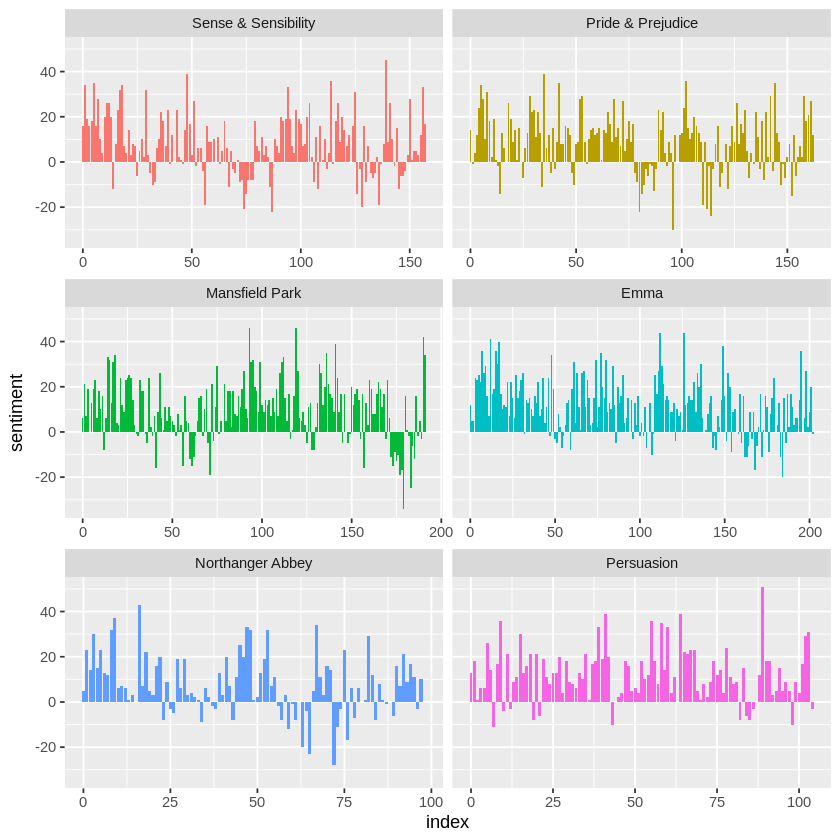

In [29]:
# ========================================================
# Step 7: Sentiment Scores Visualization
# ========================================================

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
       geom_col(show.legend = FALSE) +
       facet_wrap(~book, ncol = 2, scales = "free_x")

We can see in the above figure how the plot of each novel changes toward more positive or negative sentiment over the trajectory of the story.

#### 4.4.3 Comparing the three sentiment dictionaries



With several options for sentiment lexicons, you might want some more information on which one is appropriate for your purposes:

1. AFINN:
*   Assigns scores from -5 (most negative) to +5 (most positive)
*   Based on common English words
*   Includes intensifiers and modifiers

2. Bing:
*   Binary classification: positive or negative

3. NRC:
*   Categorizes words into 8 emotions + 2 sentiments
*   Words can belong to multiple categories
*   Based on crowdsourced annotations


Both NRC AND Bing lexicons have more negative than positive words, but the ratio of negative to positive words is higher in the Bing lexicon than the NRC lexicon. This will contribute to the effect we see in the plot above, as will any systematic difference in word matches, e.g. if the negative words in the NRC lexicon do not match the words that Jane Austen uses very well. Whatever the source of these differences, we see similar relative trajectories across the narrative arc, with similar changes in slope, but marked differences in absolute sentiment from lexicon to lexicon. This is all important context to keep in mind when choosing a sentiment lexicon for analysis.


Let’s use all three sentiment lexicons and examine how the sentiment changes across the narrative arc of Pride and Prejudice.

In [ ]:
# ========================================================
# Step 1: Pride & Prejudice Book
# ========================================================

pride_prejudice <- tidy_books %>%
                   filter(book == "Pride & Prejudice")

pride_prejudice

In [118]:
# ========================================================
# Step 2: Referencing different sentiment lexicon
# ========================================================

book_afinn <- pride_prejudice %>%
              inner_join(afinn) %>%
              group_by(index = linenumber %/% 80) %>%
              summarise(sentiment = sum(value)) %>%
              mutate(method = "AFINN")


book_bing_and_nrc <- bind_rows(pride_prejudice %>%
                                inner_join(get_sentiments("bing")) %>%
                                mutate(method = "Bing"),

                               pride_prejudice %>%
                                inner_join(nrc %>%
                                            filter(sentiment %in%
                                                  c("positive","negative")
                                                  )
                                          ) %>%
                                mutate(method = "NRC")
                              ) %>%
                     count(method, index = linenumber %/% 80, sentiment) %>%
                       spread(sentiment, n, fill = 0) %>%
                       mutate(sentiment = positive - negative)

book_three_sentiment <- bind_rows(book_bing_and_nrc,book_afinn)

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Warning message in inner_join(., nrc %>% filter(sentiment %in% c("positive", "negative"))):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 215 of `x` matches multiple rows in `y`.
ℹ Row 5178 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


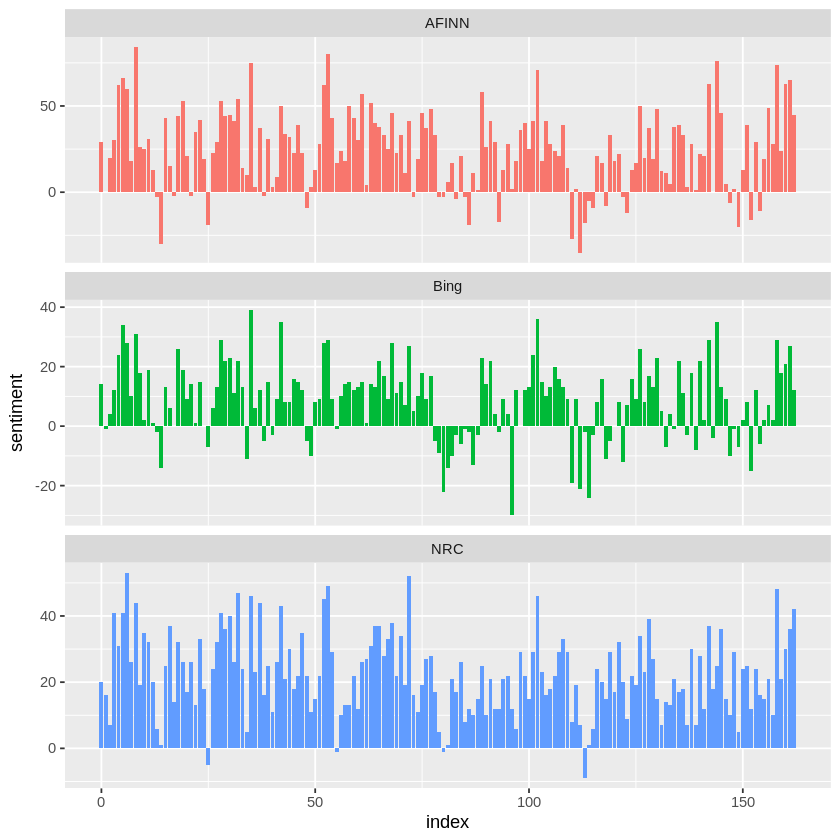

In [120]:
# ========================================================
# Step 3: Visualize on the net sentiment
# ========================================================

book_three_sentiment %>%
    ggplot(aes(index, sentiment, fill = method)) +
              geom_col(show.legend = FALSE) +
              facet_wrap(~method, ncol = 1, scales = "free_y")

The three sentiment lexicons produce **different absolute values** but show **similar relative sentiment patterns** across the novel.

1. **Common pattern**: All lexicons reveal dips and peaks in sentiment at roughly the same narrative points.

2. **Differences** in magnitude and behavior:

* AFINN: Produces the largest absolute sentiment values, with notably high positive scores.

* Bing et al.: Yields lower absolute values and tends to classify longer, continuous sections as positive or negative.

* NRC: Shows an overall upward shift (more positive bias) but still captures similar relative fluctuations.

3. These differences persist across other novels, where:

* NRC remains consistently higher in positivity.

* AFINN displays greater variance.

* Bing et al. identifies broader stretches of consistent sentiment.

* Despite these variations, all three align on the overall emotional trajectory of a narrative.

**Next Step**:

The higher positive bias in the NRC lexicon may result from its larger proportion of positive words—this can be examined by comparing the number of positive and negative terms in each lexicon.

#### 4.4.4 Histogram Plot: Most common positive and negative words

One advantage of having the data frame with both sentiment and word is that we can analyze word counts that contribute to each sentiment. By implementing `count()` here with arguments of both `word` and `sentiment`, we find out how much each word contributed to each sentiment.

Joining with `by = join_by(word)`
Warning message in inner_join(., bing):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


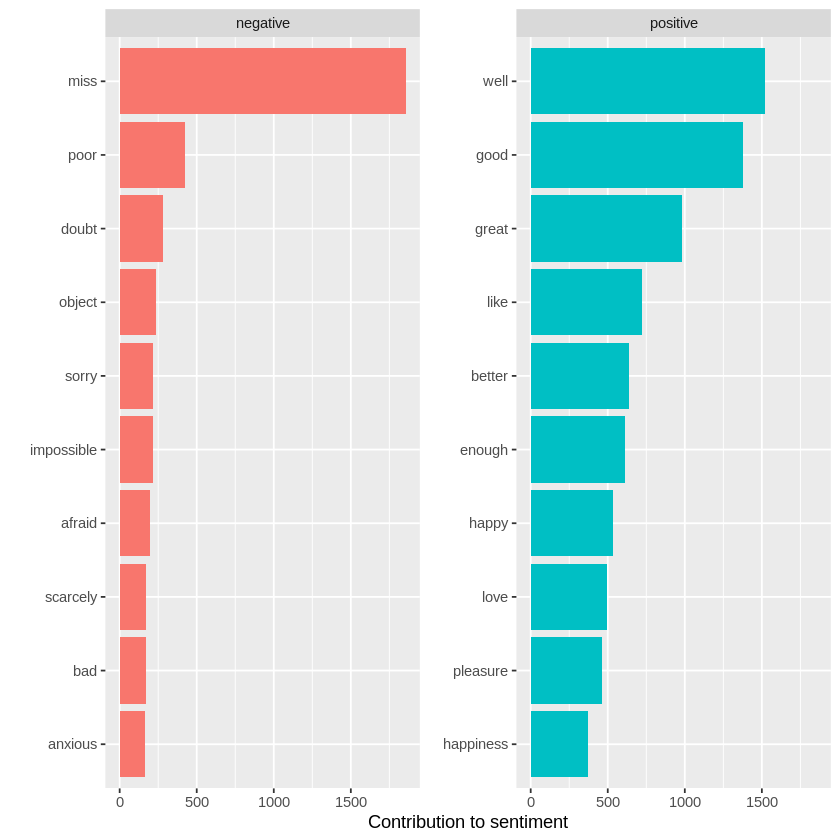

In [124]:
# ========================================================
# Step 1: Bing word counts
# ========================================================

bing_word_counts <- tidy_books %>%
                      inner_join(bing) %>%
                      count(word, sentiment, sort = TRUE) %>%
                      ungroup()

bing_word_counts %>%
    group_by(sentiment) %>%
    slice_max(n, n = 10) %>%
    ungroup() %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(n, word, fill = sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~sentiment, scales = "free_y") +
        labs(x = "Contribution to sentiment",
              y = NULL)

The generated figure lets us spot an anomaly in the sentiment analysis; the word “miss” is coded as negative but it is used as a title for young, unmarried women in Jane Austen’s works. If it were appropriate for our purposes, we could easily add “miss” to a custom stop-words list using `bind_rows()`. We could implement that with a strategy such as this.

#### 4.4.5 Word Cloud

In [ ]:
# ========================================================
# Step 1: Customize stop words
# ========================================================

custom_stop_words <- bind_rows(tibble(word = c("miss"),lexicon = c("custom")),
                               stop_words
                              )

custom_stop_words

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Joining with `by = join_by(word)`


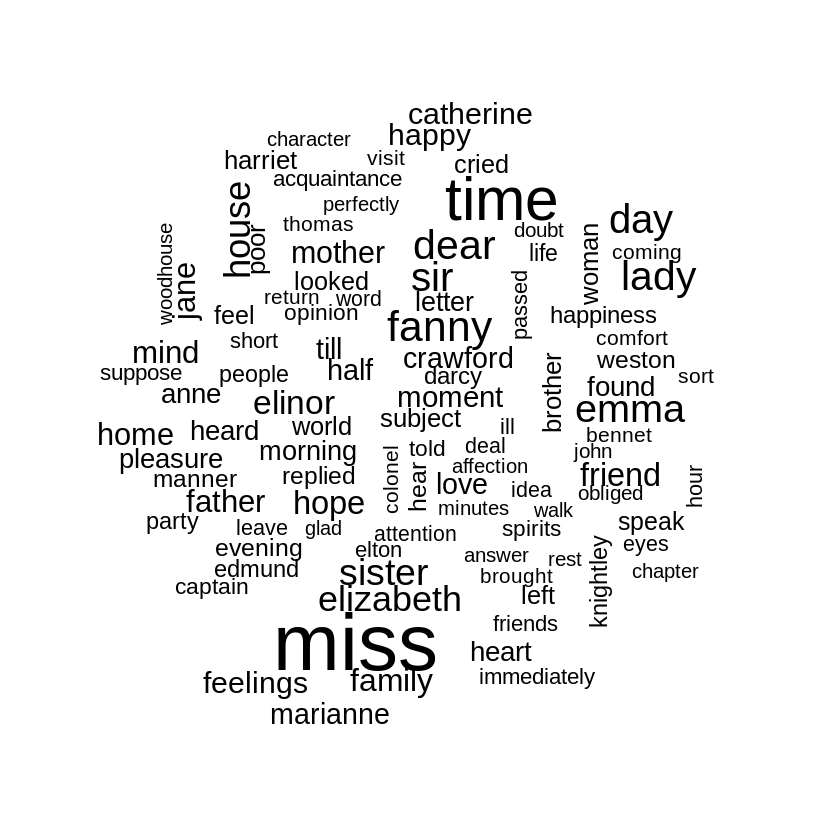

In [125]:
# ========================================================
# Step 2: World clouds
# ========================================================

install.packages("wordcloud")
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

In other functions, such as `comparison.cloud()`, you may need to turn the data frame into a matrix with reshape2’s `acast()`. Let’s do the sentiment analysis to tag positive and negative words using an inner join, then find the most common positive and negative words. Until the step where we need to send the data to `comparison.cloud()`, this can all be done with joins, piping, and dplyr because our data is in tidy format.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Joining with `by = join_by(word)`
Warning message in inner_join(., get_sentiments("bing")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


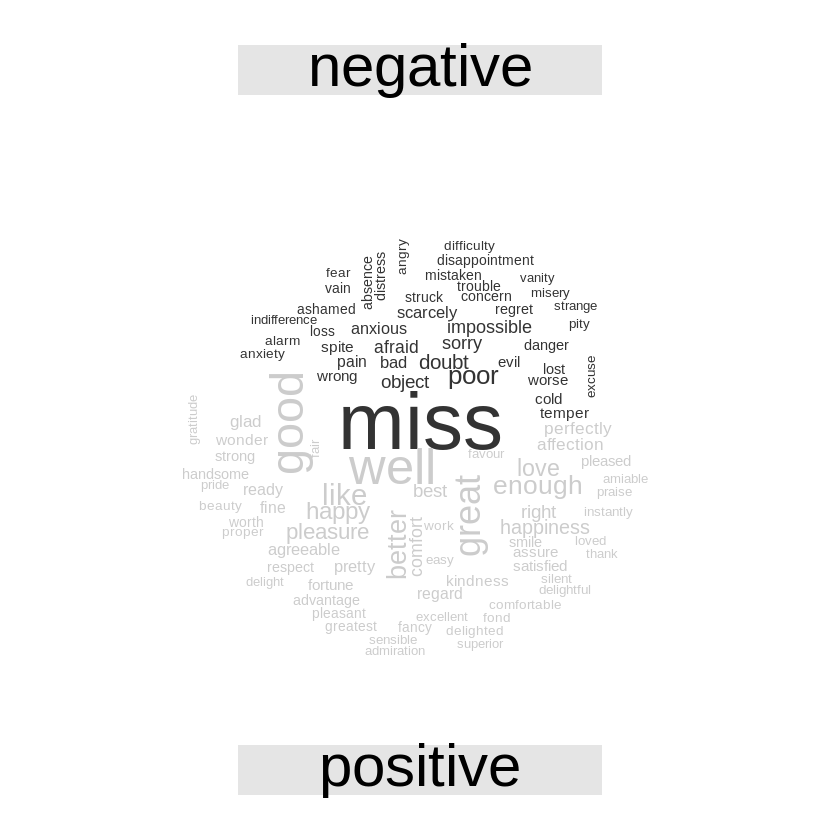

In [126]:
# ========================================================
# Step 3: Comparison World clouds
# ========================================================

install.packages("reshape2")
library(reshape2)

tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("gray20", "gray80"),
                   max.words = 100)

The size of a word’s text in the above figure is in proportion to its frequency within its sentiment. We can use this visualization to see the most important positive and negative words, but the sizes of the words are not comparable across sentiments.

#### 4.4.6 Units beyond words

Lots of useful work can be done by tokenizing at the word level, but sometimes it is useful or necessary to look at different units of text. For example, some sentiment analysis algorithms look beyond only unigrams (i.e. single words) to try to understand the sentiment of a sentence as a whole. These algorithms try to understand that

    I am not having a good day.

I am not having a good day.
is a sad sentence, not a happy one, because of negation.


R packages included coreNLP [@R-coreNLP], cleanNLP [@R-cleanNLP], and sentimentr [@R-sentimentr] are examples of such sentiment analysis algorithms. For these, we may want to tokenize text into sentences, and it makes sense to use a new name for the output column in such a case.

In [127]:
# ========================================================
# Step 1: Tidy text and tokenize
# ========================================================

p_and_p_sentences <- tibble(text = prideprejudice) %>%
                     unnest_tokens(sentence, text, token = "sentences")

head(p_and_p_sentences)

sentence
<chr>
pride and prejudice
by jane austen
chapter 1
"it is a truth universally acknowledged, that a single man in possession"
"of a good fortune, must be in want of a wife."
however little known the feelings or views of such a man may be on his


The sentence tokenizing does seem to have a bit of trouble with UTF-8 encoded text, especially with sections of dialogue; it does much better with punctuation in ASCII. One possibility, if this is important, is to try using `iconv()`, with something like `iconv(text, to = 'latin1')` in a mutate statement before unnesting.

Another option in `unnest_tokens()` is to split into tokens using a regex pattern. We could use this, for example, to split the text of Jane Austen’s novels into a data frame by chapter.

In [133]:
# ========================================================
# Step 2: Tokenize using a Regex pattern
# ========================================================


austen_chapters <- austen_books() %>%
                   group_by(book) %>%
                   unnest_tokens(chapter, text, token = "regex",
                                 pattern = "Chapter|CHAPTER [\\dIVXLC]") %>%
                   ungroup()

head(austen_chapters, 1)

book,chapter
<fct>,<chr>
Sense & Sensibility,sense and sensibility by jane austen (1811)


In [134]:
# ========================================================
# Step 3: Summarize
# ========================================================

austen_chapters %>%
group_by(book) %>%
summarise(chapters = n())

book,chapters
<fct>,<int>
Sense & Sensibility,51
Pride & Prejudice,62
Mansfield Park,49
Emma,56
Northanger Abbey,32
Persuasion,25


We have recovered the correct number of chapters in each novel (plus an “extra” row for each novel title). In the austen_chapters data frame, each row corresponds to one chapter.

Near the beginning of this chapter, we used a similar regex to find where all the chapters were in Austen’s novels for a tidy data frame organized by one-word-per-row. We can use tidy text analysis to ask questions such as what are the most negative chapters in each of Jane Austen’s novels? First, let’s get the list of negative words from the Bing lexicon. Second, let’s make a data frame of how many words are in each chapter so we can normalize for the length of chapters. Then, let’s find the number of negative words in each chapter and divide by the total words in each chapter. For each book, which chapter has the highest proportion of negative words?

In [135]:
# ========================================================
# Step 3: Summarize
# ========================================================


bingnegative <- bing %>%
                filter(sentiment == "negative")

wordcounts <- tidy_books %>%
              group_by(book, chapter) %>%
              summarize(words = n())

tidy_books %>%
    semi_join(bingnegative) %>%
    group_by(book, chapter) %>%
    summarize(negativewords = n()) %>%
    left_join(wordcounts, by = c("book", "chapter")) %>%
    mutate(ratio = negativewords/words) %>%
    filter(chapter != 0) %>%
    slice_max(ratio, n = 1) %>%
    ungroup()

`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.
Joining with `by = join_by(word)`
`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


book,chapter,negativewords,words,ratio
<fct>,<int>,<int>,<int>,<dbl>
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101


These are the chapters with the most sad words in each book, normalized for number of words in the chapter. What is happening in these chapters? In Chapter 43 of Sense and Sensibility Marianne is seriously ill, near death, and in Chapter 34 of Pride and Prejudice Mr. Darcy proposes for the first time (so badly!). Chapter 46 of Mansfield Park is almost the end, when everyone learns of Henry’s scandalous adultery, Chapter 15 of Emma is when horrifying Mr. Elton proposes, and in Chapter 21 of Northanger Abbey Catherine is deep in her Gothic faux fantasy of murder, etc. Chapter 4 of Persuasion is when the reader gets the full flashback of Anne refusing Captain Wentworth and how sad she was and what a terrible mistake she realized it to be.

## [5. Summary](#obj)

Sentiment analysis provides a way to understand the attitudes and opinions expressed in texts. In this chapter, we explored how to approach sentiment analysis using tidy data principles; when text data is in a tidy data structure, sentiment analysis can be implemented as an inner join. We can use sentiment analysis to understand how a narrative arc changes throughout its course or what words with emotional and opinion content are important for a particular text. We will continue to develop our toolbox for applying sentiment analysis to different kinds of text in our case studies later in this book.